# Universidad del Valle de Guatemala
18 Avenida 11-95 Guatemala      
Departamento de Computación     
Facultad de Ingeniería       
Minería de Datos Sección 10         
Fecha de entrega: 13/03/2024        

Grupo 1 | Integrantes:
- Diego Alexander Hernández Silvestre 21270
- Linda Inés Jimenez Vides 21169
- Mario Antonio Guerra Morales 21008
- Kristopher Javier Alvarado Lopez 21188
- David Jonathan Aragon Vasquez 21053

## Proyecto 1
Para realizar una exploración inicial del conjunto de datos, se prodeció a realizar un resumen de la información proporcionada en el dataset del archivo "*owid-co2-data.csv*". A continuación se muestran los resultados: 

In [33]:
import pandas as pd
from typing import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [34]:
dataframe: pd.DataFrame = pd.read_csv("owid-co2-data.csv",  encoding='ISO-8859-1')
infoSumary = dataframe.info() #Mostrar información del tipo de variables utilizadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48058 entries, 0 to 48057
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    48058 non-null  object 
 1   year                                       48058 non-null  int64  
 2   iso_code                                   39717 non-null  object 
 3   population                                 39495 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 23764 non-null  float64
 6   cement_co2_per_capita                      22017 non-null  float64
 7   co2                                        30308 non-null  float64
 8   co2_growth_abs                             28157 non-null  float64
 9   co2_growth_prct                            25136 non-null  float64
 10  co2_including_luc     

In [35]:
dataframe.columns #Se muestran las columnas del dataframe.

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [47]:
dataframe.describe() #Se describen las características principales de las variables cuantitativas del dataframe.

,year,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,co2_including_luc,co2_including_luc_growth_abs,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
count,48058.000000,4.805800e+04,4.805800e+04,48058.000000,48058.000000,48058.000000,48058.000000,48058.000000,48058.000000,48058.000000,...,48058.000000,48058.000000,48058.000000,48058.000000,48058.000000,48058.000000,48058.000000,48058.000000,48058.000000,48058.000000
mean,1926.842565,6.083223e+07,2.677586e+11,9.109400,0.066798,391.272161,5.868310,20.055703,534.225708,7.445587,...,19.199870,2.190116,0.002956,0.006886,0.010069,0.000497,790.430981,759.384745,-7.157874,20.368010
std,59.414846,2.978772e+08,1.157757e+12,46.736462,0.084854,1473.771272,45.808001,497.106505,1507.867465,67.558304,...,7.764372,8.397567,0.014216,0.036989,0.053293,0.002604,1312.751638,1284.067000,81.414981,15.945268
min,1750.000000,2.220000e+02,4.998000e+07,0.000000,0.000000,0.000000,-2032.366000,-100.000000,-187.847000,-2334.695000,...,0.000000,-0.899000,-0.001000,0.000000,-0.001000,0.000000,-186.660000,0.010000,-2367.758000,-99.795000
25%,1883.000000,6.076392e+05,2.018707e+11,0.033000,0.016000,1.257750,0.004000,3.257250,30.212000,0.124000,...,19.199870,0.006000,0.000000,0.000000,0.000000,0.000000,790.430981,759.384745,-7.157874,20.368010
50%,1930.000000,4.295553e+06,2.677586e+11,9.109400,0.066798,75.398500,3.592000,20.055703,534.225708,7.445587,...,19.199870,0.115000,0.000000,0.000000,0.000000,0.000000,790.430981,759.384745,-7.157874,20.368010
75%,1976.000000,6.083223e+07,2.677586e+11,9.109400,0.066798,391.272161,5.868310,20.055703,534.225708,7.445587,...,19.199870,1.327750,0.002956,0.003000,0.005000,0.000497,790.430981,759.384745,-7.157874,20.368010
max,2022.000000,7.975105e+09,1.136302e+14,1692.404000,2.574000,37149.785000,1813.064000,102318.508000,41637.617000,2340.859000,...,100.000000,100.000000,0.415000,1.113000,1.611000,0.083000,49880.602000,48089.621000,2187.777000,576.482000


In [37]:
# Seleccionar solo las columnas numéricas en el DataFrame
numeric_columns = dataframe.select_dtypes(include='number').columns

# Aplicar la conversión a media solo a las columnas numéricas
dataframe[numeric_columns] = dataframe[numeric_columns].fillna(dataframe[numeric_columns].mean())

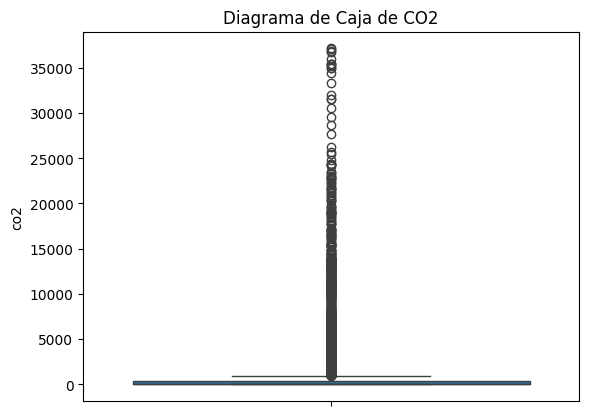

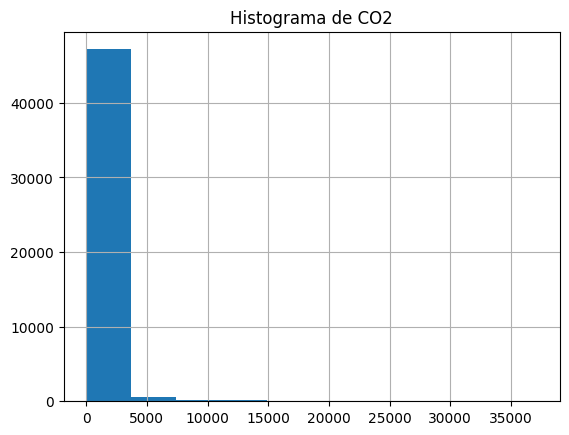

In [42]:
#Gráficos exploratorios del CO2.

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dataframe['co2'])
plt.title("Diagrama de Caja de CO2")
plt.show()

dataframe['co2'].hist()
plt.title("Histograma de CO2")
plt.show()

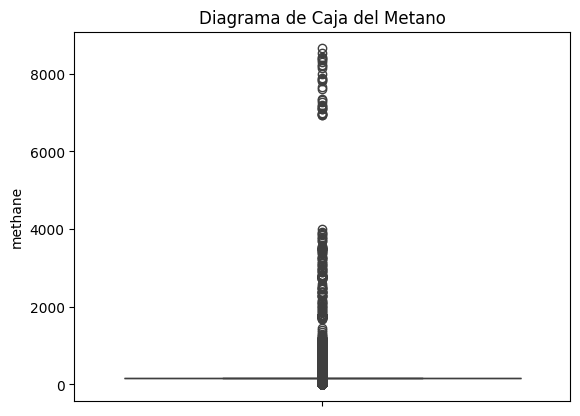

In [43]:
#Gráficos exploratorios del Metano.

sns.boxplot(data=dataframe['methane'])
plt.title("Diagrama de Caja del Metano")
plt.show()


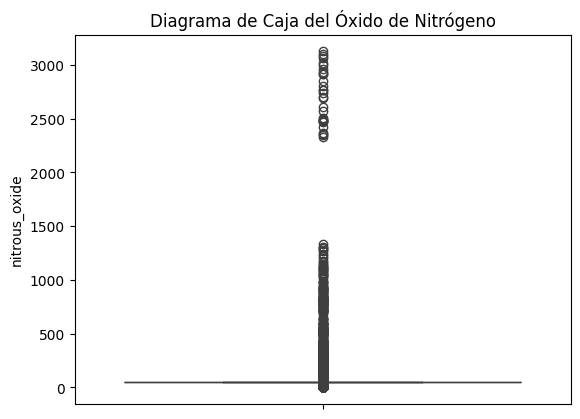

In [44]:
#Gráficos exploratorios del Óxido de Nitrógeno.

sns.boxplot(data=dataframe['nitrous_oxide'])
plt.title("Diagrama de Caja del Óxido de Nitrógeno")
plt.show()

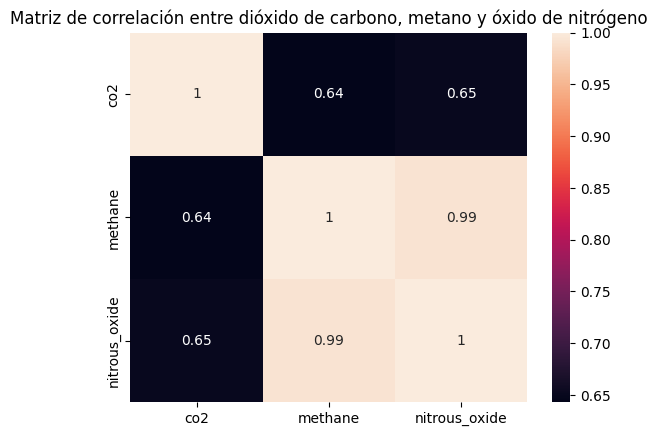

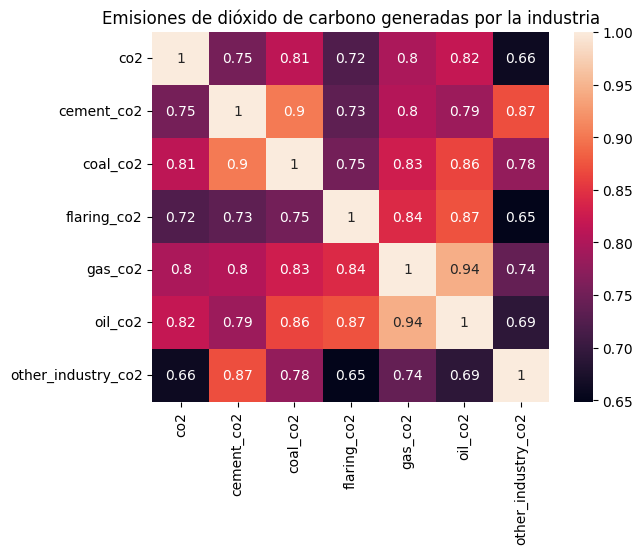

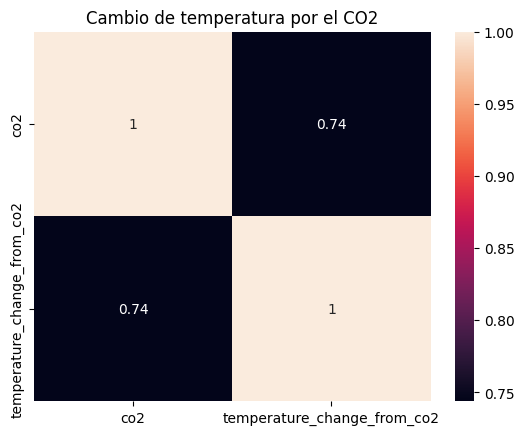

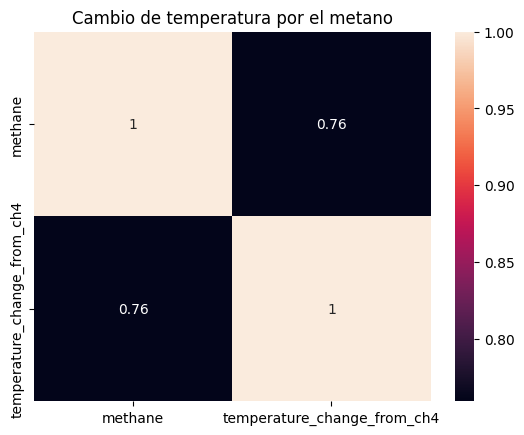

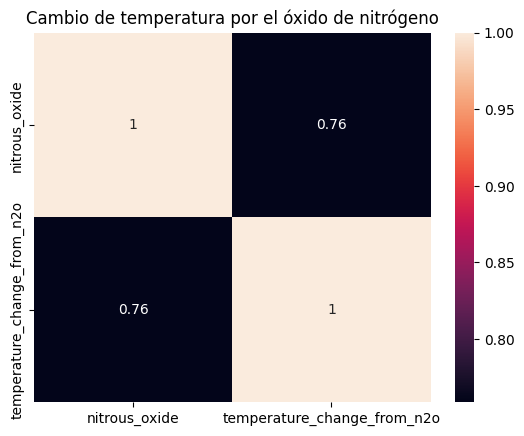

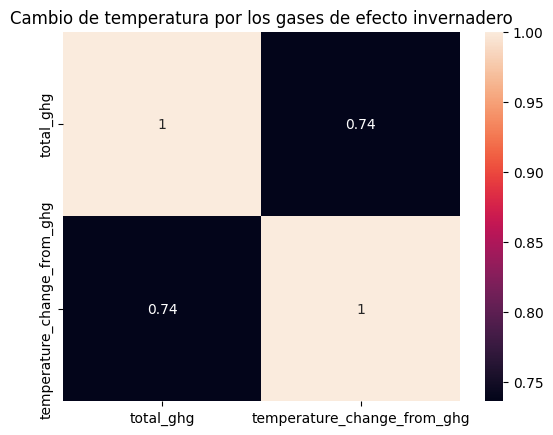

In [57]:
# Análisis de correlaciones.

ghg_variables = ['co2', 'methane', 'nitrous_oxide']

correlation_ghg = dataframe[ghg_variables].corr()
plt.title("Matriz de correlación entre dióxido de carbono, metano y óxido de nitrógeno")
sns.heatmap(correlation_ghg, annot=True)
plt.show()

co2_variables = ['co2', 'cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2', 'other_industry_co2']

correlation_co2 = dataframe[co2_variables].corr()
plt.title("Emisiones de dióxido de carbono generadas por la industria")
sns.heatmap(correlation_co2, annot=True)
plt.show()

temperature_variables_co2 = ['co2', 'temperature_change_from_co2']

correlation_tempco2 = dataframe[temperature_variables_co2].corr()
plt.title("Cambio de temperatura por el CO2")
sns.heatmap(correlation_tempco2, annot=True)
plt.show()

temperature_variables_ch4 = ['methane', 'temperature_change_from_ch4']

correlation_tempch4 = dataframe[temperature_variables_ch4].corr()
plt.title("Cambio de temperatura por el metano")
sns.heatmap(correlation_tempch4, annot=True)
plt.show()

temperature_variables_n2o = ['nitrous_oxide', 'temperature_change_from_n2o']

correlation_tempn2o = dataframe[temperature_variables_n2o].corr()
plt.title("Cambio de temperatura por el óxido de nitrógeno")
sns.heatmap(correlation_tempn2o, annot=True)
plt.show()

temperature_variables_ghg = ['total_ghg', 'temperature_change_from_ghg']

correlation_tempghg = dataframe[temperature_variables_ghg].corr()
plt.title("Cambio de temperatura por los gases de efecto invernadero")
sns.heatmap(correlation_tempghg, annot=True)
plt.show()

